In [32]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import root_mean_squared_error

In [33]:
df = pd.read_csv('data/salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
88579,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [34]:
exp_level_abbr = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df['experience_level'] = df['experience_level'].map(exp_level_abbr)

comp_size_abbr = {'S': 0, 'M': 2, 'L': 2}
df['company_size'] = df['company_size'].map(comp_size_abbr)

df = df.drop(columns=['salary'])

In [35]:
job_title_keywords = set()

for job_title in df['job_title']:
    for word in job_title.strip().lower().split(' '):
        job_title_keywords.add(word)

print(job_title_keywords)
print(len(job_title_keywords))

{'account', 'prompt', 'computational', 'manager', 'lead', 'computer', 'operations', 'sas', 'genai', 'postdoctoral', 'integrator', 'management', 'bi', 'data', 'delivery', 'application', 'machine', 'coordinator', 'learning', 'database', 'solutions', 'integrity', 'nlp', 'robotics', 'frontend', 'scientist', 'algorithm', 'dataops', 'head', 'cloud', 'sales', 'representative', 'analysis', 'technical', 'deep', 'partner', 'customer', 'engineering', 'researcher', 'decision', 'platform', 'encounter', 'writer', 'performance', 'technician', 'crm', 'insight', 'associate', 'reporter', 'scala', 'quality', 'chatbot', 'artificial', 'compliance', 'solution', 'spark', 'integration', 'elasticsearch', 'analytics', 'science', 'model', 'vehicle', 'marketing', 'etl', 'safety', 'designer', 'executive', 'master', 'and', 'finance', 'visualization', 'technology', 'admin', 'pipeline', 'programmer', 'professional', 'java', 'fellow', 'ml', 'risk', 'tableau', 'director', 'autonomous', 'python', 'principal', 'advocate'

In [36]:
df_synthetic = df.copy()

df_synthetic['job_title_lower'] = df_synthetic['job_title'].str.lower()

new_cols = {}

for keyword in job_title_keywords:
    col_name = f'keyword_{keyword}'
    new_cols[col_name] = df_synthetic['job_title_lower'].str.contains(keyword)

df_synthetic = pd.concat([df_synthetic, pd.DataFrame(new_cols)], axis=1)

df_synthetic = df_synthetic.drop(columns=['job_title_lower'])

df_synthetic

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,...,keyword_of,keyword_statistician,keyword_strategist,keyword_success,keyword_applied,keyword_controls,keyword_staff,keyword_owner,keyword_fullstack,keyword_people
0,2025,1,FT,Customer Success Manager,EUR,60000,NL,50,NL,2,...,False,False,False,True,False,False,False,False,False,False
1,2025,2,FT,Engineer,USD,165000,US,0,US,2,...,False,False,False,False,False,False,False,False,False,False
2,2025,2,FT,Engineer,USD,109000,US,0,US,2,...,False,False,False,False,False,False,False,False,False,False
3,2025,2,FT,Applied Scientist,USD,294000,US,0,US,2,...,False,False,False,False,True,False,False,False,False,False
4,2025,2,FT,Applied Scientist,USD,137600,US,0,US,2,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88579,2020,2,FT,Data Scientist,USD,412000,US,100,US,2,...,False,False,False,False,False,False,False,False,False,False
88580,2021,1,FT,Principal Data Scientist,USD,151000,US,100,US,2,...,False,False,False,False,False,False,False,False,False,False
88581,2020,0,FT,Data Scientist,USD,105000,US,100,US,0,...,False,False,False,False,False,False,False,False,False,False
88582,2020,0,CT,Business Data Analyst,USD,100000,US,100,US,2,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df = pd.get_dummies(df, columns=['employment_type', 'employee_residence', 'company_location'])
df_synthetic = pd.get_dummies(df_synthetic, columns=['employment_type'])

df = df.drop(columns=['job_title', 'salary_currency'])
df_synthetic = df_synthetic.drop(columns=['job_title', 'salary_currency', 'employee_residence', 'company_location'])

print(f'df size = {len(df.columns)}')
print(f'df_synthetic size = {len(df_synthetic.columns)}')

df size = 195
df_synthetic size = 160


Root Mean Squared Error: 67672.24
Coefficients: [2980.823593823637, 31972.38087214092, -139.65185730787482, 1281.480050699829, -2607.2470542937335, 828.9821586919479, 19974.3506379883, -18196.08574238491, -10435.485100729678, -956.275477238747, -91078.76606454278, -23646.943345756645, -1758.457317926608, -17881.93910264311, 29989.206950698328, -25789.69333034961, 27425.581382544424, -45348.577851775706, -1094.8807744501792, -23919.98067483508, 1879.5303006079644, 24227.6573697711, -24976.359154806938, 23699.571869342362, 38052.40019732938, 92207.20381375449, -6975.393665457712, -23974.541855420557, -21793.227208179305, 50884.71455088322, -128.09098760402412, 30252.761094712267, 124805.65987432249, 50019.795658929055, -6949.191400822458, -17015.398921593314, 23146.940305670018, 9706.869550225358, 54043.640505155316, 8116.910254186718, -350.8585290712126, -84952.57783569072, -1768.72070065534, -25867.03050047563, -8051.7615841184725, -18949.60976186905, 8484.70089178595, -54616.623862775

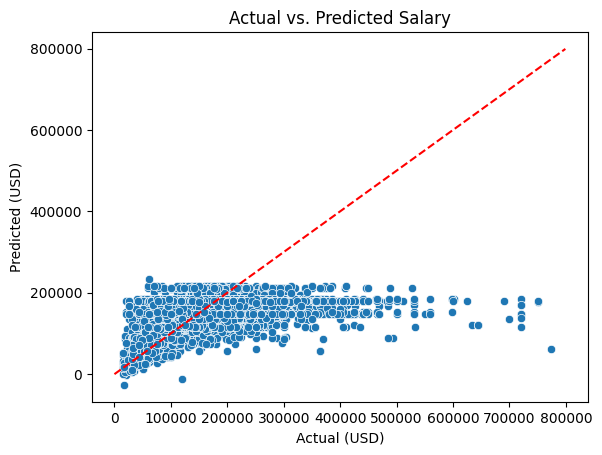

In [38]:
prediction_col = 'salary_in_usd'

X = df.drop(columns=[prediction_col])
y = df[prediction_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Coefficients: {model.coef_.tolist()}")
print(f"Intercept: {model.intercept_}")

plot = sns.scatterplot(x=y_test, y=y_pred)
vals = range(0,800000,1000)
plt.plot(vals, vals, color='red', linestyle='--', label='y=x')
plt.title('Actual vs. Predicted Salary')
plt.xlabel('Actual (USD)')
plt.ylabel('Predicted (USD)')
plt.show()

Root Mean Squared Error: 63788.60
Coefficients: [2582.622098497491, 25523.651163273105, -96.55710370541829, 22345.82592171687, -3579.9962837055755, 19301.89278135717, -38947.04247255719, 6866.253550285066, -2890.170934402424, 41764.218919349616, -7724.29744998192, 16558.382447747335, 9074.772316968762, -25525.14062993442, -17988.819796065174, -6181.567746461349, -21073.029305233424, -19406.873349587604, 2999.928597176535, 5089.628734621798, -21339.307851848924, -62348.28975722342, 45295.21262803501, 20817.485598921052, 11097.952945198063, -4261.983137509954, -35505.77506227529, -24582.22888136079, 21338.756509690396, 19021.40617499051, 38102.32960326472, -15979.299195141159, 46358.35544167743, -21068.485671160448, 1675.0502066145564, -44699.095215394394, 19973.873102050962, 7237.864967344878, -14469.997295471861, -172302.3232629131, 1.0186340659856796e-10, 85163.69327602282, -54411.779673857185, -27531.310496005368, -279.9119992529504, 4960.297694111496, -12548.272162645853, 57340.8373

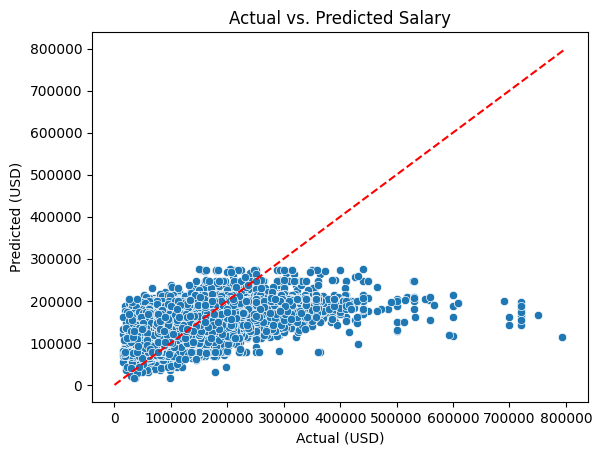

In [39]:
prediction_col = 'salary_in_usd'

X = df_synthetic.drop(columns=[prediction_col])
y = df_synthetic[prediction_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Coefficients: {model.coef_.tolist()}")
print(f"Intercept: {model.intercept_}")

plot = sns.scatterplot(x=y_test, y=y_pred)
vals = range(0,800000,1000)
plt.plot(vals, vals, color='red', linestyle='--', label='y=x')
plt.title('Actual vs. Predicted Salary')
plt.xlabel('Actual (USD)')
plt.ylabel('Predicted (USD)')
plt.show()

In [40]:
selector = SelectKBest(score_func=f_classif, k=50)
X_new = selector.fit_transform(X, y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

c:\Users\HENSLEYAS21\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Root Mean Squared Error: 64789.63
work_year                2430.02
experience_level         25937.37
remote_ratio             -108.41
company_size             24629.05
keyword_computational    -30179.75
keyword_sas              -16403.30
keyword_genai            7672.17
keyword_postdoctoral     -48548.31
keyword_management       -5923.62
keyword_data             -28502.36
keyword_machine          -86467.15
keyword_learning         98340.71
keyword_integrity        -2858.89
keyword_nlp              -37142.15
keyword_scientist        23952.37
keyword_head             62575.80
keyword_deep             -92834.10
keyword_encounter        2728.93
keyword_insight          -27376.78
keyword_associate        -26580.02
keyword_scala            -47374.51
keyword_spark            -47374.51
keyword_master           -28730.41
keyword_and              31986.79
keyword_finance          -53568.57
keyword_programmer       -23071.41
keyword_professional     -49001.21
keyword_fellow           -17946.77
ke

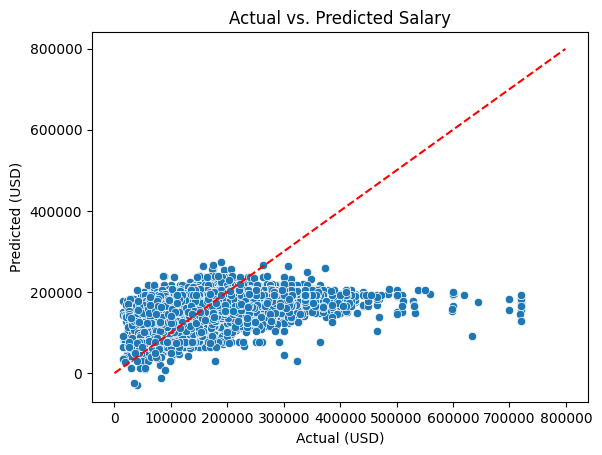

In [41]:
prediction_col = 'salary_in_usd'

X = df_synthetic[selected_columns]
y = df_synthetic[prediction_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
for i in range(len(selected_columns)):
    print(f"{selected_columns[i].ljust(24)} {model.coef_.tolist()[i]:.2f}")
#print(f"Coefficients: {model.coef_.tolist()}")
print(f"Intercept: {model.intercept_}")

plot = sns.scatterplot(x=y_test, y=y_pred)
vals = range(0,800000,1000)
plt.plot(vals, vals, color='red', linestyle='--', label='y=x')
plt.title('Actual vs. Predicted Salary')
plt.xlabel('Actual (USD)')
plt.ylabel('Predicted (USD)')
plt.show()